In [1]:
import pandas as pd
import numpy as np

In [2]:
html_2015 = pd.read_html("2015_dividends.xls")

In [3]:
html_2015[0].head()

회사명    종목코드  사업연도 결산월     업종 업종별 배당율 주식배당 (배당기준일)  현금배당                  \
      회사명    종목코드  사업연도 결산월     업종 업종별 배당율 주식배당 (배당기준일)   액면가     기말주식수 주당배당금   
0      3S   60310  2015   3    반도체    0.41            -   500  40892268     -   
1  AJ네트웍스   95570  2015  12  일반서비스    0.84            -  5000   9364459     -   
2   AK홀딩스    6840  2015  12  일반서비스    0.84            -  5000  13247561   500   
3     APS   54620  2015  12    반도체    0.53            -   500  23409961     -   
4   AP시스템  265520  2015  12      -       -            -     -         -     -   

                               
      배당성향       총배당금액  시가배당률  
0        -           -      -  
1        -           -      -  
2  -17.220  6447747500  0.800  
3        -           -      -  
4        -           -      -

dividends_merged에 2015~ 2019년 기업별 배당성향을 dataframe 저장
배당성향 데이터는 KIND에서 가져올 수 있음(https://kind.krx.co.kr/disclosureinfo/dividendinfo.do?method=searchDividendInfoMain)

In [4]:
html_2015 = pd.read_html("2015_dividends.xls")
html_2016 = pd.read_html("2016_dividends.xls")
html_2017 = pd.read_html("2017_dividends.xls")
html_2018 = pd.read_html("2018_dividends.xls")
html_2019 = pd.read_html("2019_dividends.xls")
html_2020 = pd.read_html("2020_dividends.xls")
html_2021 = pd.read_html("2021_dividends.xls")
html_2022 = pd.read_html("2022_dividends.xls")
html_2023 = pd.read_html("2023_dividends.xls")
html_2024 = pd.read_html("2024_dividends.xls")
html_list = [html_2015, html_2016, html_2017, html_2018, html_2019, html_2020, html_2021, html_2022, html_2023, html_2024,]
dividends_list = []
for html in html_list :
    dividends = html[0][[('회사명','회사명'), ('현금배당', '배당성향')]]
    dividends.head()
    dividends.columns = ['_'.join(col) for col in dividends.columns]
    dividends.columns = ['회사명', '배당성향']
    dividends = dividends.replace({'-' : '0'})
    dividends['배당성향'] = dividends['배당성향'].str.rstrip('*').str.strip()
    dividends['배당성향'] = dividends['배당성향'].str.replace(',', '').astype(float)
    dividends_list.append(dividends)
dividends_list[0].columns = ['회사명', '배당성향_15']
dividends_list[1].columns = ['회사명', '배당성향_16']
dividends_list[2].columns = ['회사명', '배당성향_17']
dividends_list[3].columns = ['회사명', '배당성향_18']
dividends_list[4].columns = ['회사명', '배당성향_19']
dividends_list[5].columns = ['회사명', '배당성향_20']
dividends_list[6].columns = ['회사명', '배당성향_21']
dividends_list[7].columns = ['회사명', '배당성향_22']
dividends_list[8].columns = ['회사명', '배당성향_23']
dividends_list[9].columns = ['회사명', '배당성향_24']
dividends_merged = pd.merge(dividends_list[0], dividends_list[1], how = 'left', on =['회사명'])
for div in dividends_list[2:] :
    dividends_merged = pd.merge(dividends_merged, div, how = 'left', on = ['회사명'])

In [5]:
dividends_merged

,회사명,배당성향_15,배당성향_16,배당성향_17,배당성향_18,배당성향_19,배당성향_20,배당성향_21,배당성향_22,배당성향_23,배당성향_24
0,3S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,AJ네트웍스,0.000,16.449,19.503,8.715,33.342,-296.433,15.752,137.826,73.681,0.0
2,AK홀딩스,-17.220,5.320,4.521,4.735,17.052,-1.963,-1.309,-2.192,2.001,0.0
3,APS,0.000,3.493,0.067,19.162,0.000,0.000,7.799,0.000,0.000,0.0
4,AP시스템,0.000,0.000,2.317,9.817,11.671,8.452,6.325,4.934,6.755,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2716,흥국에프엔비,22.236,20.981,13.401,25.434,19.863,9.031,18.301,13.011,17.817,0.0
2717,흥국화재,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2718,흥아해운,5.559,-3.683,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2719,희림,35.206,59.892,34.741,32.511,53.189,39.976,30.632,26.518,29.695,0.0


## 1. 15년 ~ 19년 평균 배당성향과 20년 ~ 24년 주가 상승률 비교

배당성향이 90초과 0 미만인 특수한 경우가 있는 회사를 dividends_merged에서 제거

In [6]:
dividends_filtered = dividends_merged[ 
(dividends_merged['배당성향_15'] >= 0) & (dividends_merged['배당성향_15'] <= 90) &
(dividends_merged['배당성향_16'] >= 0) & (dividends_merged['배당성향_16'] <= 90) &
(dividends_merged['배당성향_17'] >= 0) & (dividends_merged['배당성향_17'] <= 90) &
(dividends_merged['배당성향_18'] >= 0) & (dividends_merged['배당성향_18'] <= 90) &
(dividends_merged['배당성향_19'] >= 0) & (dividends_merged['배당성향_19'] <= 90) 
]

In [7]:
dividends_filtered

,회사명,배당성향_15,배당성향_16,배당성향_17,배당성향_18,배당성향_19,배당성향_20,배당성향_21,배당성향_22,배당성향_23,배당성향_24
0,3S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,AJ네트웍스,0.000,16.449,19.503,8.715,33.342,-296.433,15.752,137.826,73.681,0.0
3,APS,0.000,3.493,0.067,19.162,0.000,0.000,7.799,0.000,0.000,0.0
4,AP시스템,0.000,0.000,2.317,9.817,11.671,8.452,6.325,4.934,6.755,0.0
6,AP헬스케어,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2715,흥국,43.698,25.538,22.154,18.520,26.394,17.687,19.472,29.719,20.161,0.0
2716,흥국에프엔비,22.236,20.981,13.401,25.434,19.863,9.031,18.301,13.011,17.817,0.0
2717,흥국화재,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2719,희림,35.206,59.892,34.741,32.511,53.189,39.976,30.632,26.518,29.695,0.0


In [8]:
dividends_filtered = dividends_filtered.set_index('회사명')

5년 평균 배당성향 구하기

In [9]:
dividends_filtered['15년~19년 배당성향 평균'] = dividends_filtered[['배당성향_15', '배당성향_16', '배당성향_17', '배당성향_18', '배당성향_19']].mean(axis = 1)

In [10]:
dividends_filtered

,배당성향_15,배당성향_16,배당성향_17,배당성향_18,배당성향_19,배당성향_20,배당성향_21,배당성향_22,배당성향_23,배당성향_24,15년~19년 배당성향 평균
회사명,,,,,,,,,,,
3S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000
AJ네트웍스,0.000,16.449,19.503,8.715,33.342,-296.433,15.752,137.826,73.681,0.0,15.6018
APS,0.000,3.493,0.067,19.162,0.000,0.000,7.799,0.000,0.000,0.0,4.5444
AP시스템,0.000,0.000,2.317,9.817,11.671,8.452,6.325,4.934,6.755,0.0,4.7610
AP헬스케어,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
흥국,43.698,25.538,22.154,18.520,26.394,17.687,19.472,29.719,20.161,0.0,27.2608
흥국에프엔비,22.236,20.981,13.401,25.434,19.863,9.031,18.301,13.011,17.817,0.0,20.3830
흥국화재,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000


2020년 1월 4일 주가와 2024년 12월 30일 주가 가져오기

In [11]:
import chardet
with open('share_prices_210104.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [12]:
stock_prices_2021 = pd.read_csv('share_prices_210104.csv', encoding = 'EUC-KR')
stock_prices_2024 = pd.read_csv('share_prices_241230.csv', encoding = 'EUC-KR')

In [13]:
stock_prices_2021_start = stock_prices_2021[['종목명', '시가']]
stock_prices_2021_start = stock_prices_2021_start.set_index('종목명')

In [14]:
stock_prices_2024 = stock_prices_2024[stock_prices_2024['시가'] != 0]
stock_prices_2024_finish = stock_prices_2024[['종목명', '종가']]
stock_prices_2024_finish = stock_prices_2024_finish.set_index('종목명')


In [15]:
dividends_and_share_prices = pd.merge(dividends_filtered, stock_prices_2021_start, left_index = True, right_index = True, how = 'left')

In [16]:
dividends_and_share_prices = pd.merge(dividends_and_share_prices, stock_prices_2024_finish, left_index = True, right_index = True, how = 'left')

In [17]:
dividends_and_share_prices

,배당성향_15,배당성향_16,배당성향_17,배당성향_18,배당성향_19,배당성향_20,배당성향_21,배당성향_22,배당성향_23,배당성향_24,15년~19년 배당성향 평균,시가,종가
회사명,,,,,,,,,,,,,
3S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,2185.0,1848.0
AJ네트웍스,0.000,16.449,19.503,8.715,33.342,-296.433,15.752,137.826,73.681,0.0,15.6018,4615.0,4305.0
APS,0.000,3.493,0.067,19.162,0.000,0.000,7.799,0.000,0.000,0.0,4.5444,NaN,5260.0
AP시스템,0.000,0.000,2.317,9.817,11.671,8.452,6.325,4.934,6.755,0.0,4.7610,25100.0,15760.0
AP헬스케어,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,NaN,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국,43.698,25.538,22.154,18.520,26.394,17.687,19.472,29.719,20.161,0.0,27.2608,5800.0,5320.0
흥국에프엔비,22.236,20.981,13.401,25.434,19.863,9.031,18.301,13.011,17.817,0.0,20.3830,2105.0,1620.0
흥국화재,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,2810.0,3670.0


시가, 종가에 결측값이 있는 행을 제외

In [18]:
dividends_and_share_prices = dividends_and_share_prices.dropna()
dividends_and_share_prices = dividends_and_share_prices[(dividends_and_share_prices ['시가'] != 0) & (dividends_and_share_prices['종가'] != 0)]

In [20]:
dividends_and_share_prices['주가 상승률'] = (((dividends_and_share_prices['종가'] - dividends_and_share_prices['시가']) / dividends_and_share_prices['시가']) * 100).round(1)

In [21]:
dividends_and_share_prices.sort_values('주가 상승률')

,배당성향_15,배당성향_16,배당성향_17,배당성향_18,배당성향_19,배당성향_20,배당성향_21,배당성향_22,배당성향_23,배당성향_24,15년~19년 배당성향 평균,시가,종가,주가 상승률
회사명,,,,,,,,,,,,,,
엔지켐생명과학,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,105300.0,1425.0,-98.6
피씨엘,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,36800.0,554.0,-98.5
골든센츄리,0.000,0.000,3.722,3.193,0.000,2.193,0.000,0.000,0.000,0.0,1.3830,283.0,6.0,-97.9
에이스테크,5.867,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.1734,27200.0,708.0,-97.4
아이큐어,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,63000.0,1815.0,-97.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효성중공업,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,17.646,0.0,0.0000,62700.0,393000.0,526.8
오리엔트정공,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,855.0,6630.0,675.4
대한전선,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0000,1370.0,11150.0,713.9


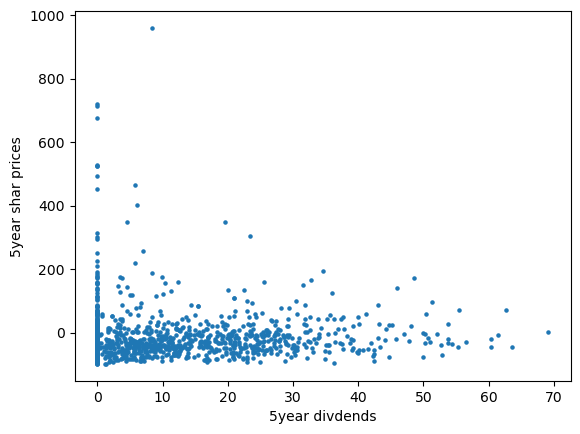

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dividends_and_share_prices['15년~19년 배당성향 평균'], dividends_and_share_prices['주가 상승률'], s = 5)
plt.xlabel('5year divdends')
plt.ylabel('5year shar prices')
plt.show()

## 2. 20년 ~ 24년 평균 배당성향과 20년 ~ 24년 주가 상승률 비교

In [29]:
dividends_filtered = dividends_merged[ 
(dividends_merged['배당성향_20'] >= 0) & (dividends_merged['배당성향_20'] <= 90) &
(dividends_merged['배당성향_21'] >= 0) & (dividends_merged['배당성향_21'] <= 90) &
(dividends_merged['배당성향_22'] >= 0) & (dividends_merged['배당성향_22'] <= 90) &
(dividends_merged['배당성향_23'] >= 0) & (dividends_merged['배당성향_23'] <= 90) &
(dividends_merged['배당성향_24'] >= 0) & (dividends_merged['배당성향_24'] <= 90) 
]
dividends_filtered = dividends_filtered.set_index('회사명')
dividends_filtered['20년~24년 배당성향 평균'] = dividends_filtered[['배당성향_20', '배당성향_21', '배당성향_22', '배당성향_23', '배당성향_24']].mean(axis = 1)
dividends_and_share_prices = pd.merge(dividends_filtered, stock_prices_2021_start, left_index = True, right_index = True, how = 'left')
dividends_and_share_prices = pd.merge(dividends_and_share_prices, stock_prices_2024_finish, left_index = True, right_index = True, how = 'left')
dividends_and_share_prices = dividends_and_share_prices.dropna()
dividends_and_share_prices = dividends_and_share_prices[(dividends_and_share_prices ['시가'] != 0) & (dividends_and_share_prices['종가'] != 0)]
dividends_and_share_prices['주가 상승률'] = (((dividends_and_share_prices['종가'] - dividends_and_share_prices['시가']) / dividends_and_share_prices['시가']) * 100).round(1)

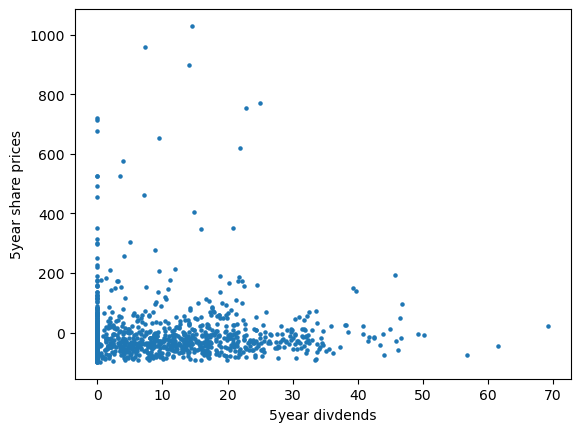

In [34]:
import matplotlib.pyplot as plt
plt.scatter(dividends_and_share_prices['20년~24년 배당성향 평균'], dividends_and_share_prices['주가 상승률'], s = 5)
plt.xlabel('5year divdends')
plt.ylabel('5year share prices')
plt.show()

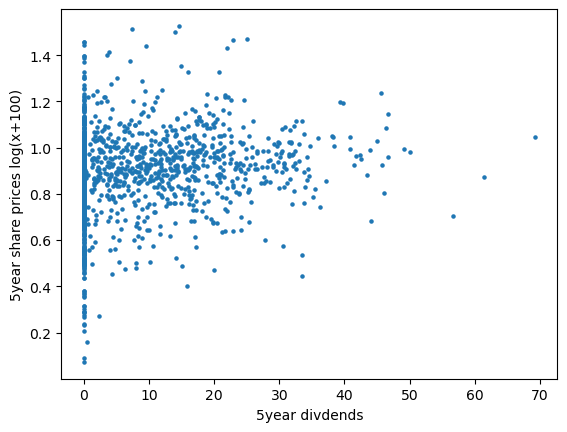

In [37]:
plt.scatter(dividends_and_share_prices['20년~24년 배당성향 평균'] , np.log(dividends_and_share_prices['주가 상승률']+100) / np.log(100), s = 5)
plt.xlabel('5year divdends')
plt.ylabel('5year share prices log(x+100)')
plt.show()

In [66]:
np.mean(dividends_and_share_prices[dividends_and_share_prices['20년~24년 배당성향 평균'] == 0]['주가 상승률'])

np.float64(-28.696574225122347)

In [67]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 0) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 5)]['주가 상승률'])

np.float64(-6.5572413793103435)

In [68]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 5) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 10)]['주가 상승률'])

np.float64(-5.9873333333333285)

In [69]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 10) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 15)]['주가 상승률'])

np.float64(-2.0448529411764698)

In [70]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 15) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 20)]['주가 상승률'])

np.float64(-7.845299145299147)

In [71]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 20) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 25)]['주가 상승률'])

np.float64(21.104651162790695)

In [72]:
np.mean(dividends_and_share_prices[(dividends_and_share_prices['20년~24년 배당성향 평균'] > 25) & (dividends_and_share_prices['20년~24년 배당성향 평균'] <= 30)]['주가 상승률'])

np.float64(-24.77894736842105)